<a href="https://colab.research.google.com/github/SandKrish/TimeSeries/blob/main/Daily_Female_Births_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The following code snippet is used to upload a file from the local drive to Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Daily Female Births Dataset.csv to Daily Female Births Dataset.csv
User uploaded file "Daily Female Births Dataset.csv" with length 5491 bytes


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import read_excel
import matplotlib.pyplot as plt
from matplotlib import ticker
import plotly.express as px
import seaborn as sns

import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

In [ ]:
df = pd.read_csv('Daily Female Births Dataset.csv',index_col='Date', parse_dates=False)

In [ ]:
df.head()

,Births
Date,
01-01-1959,35
02-01-1959,32
03-01-1959,30
04-01-1959,31
05-01-1959,44


In [ ]:
df.tail()

,Births
Date,
27-12-1959,37
28-12-1959,52
29-12-1959,48
30-12-1959,55
31-12-1959,50


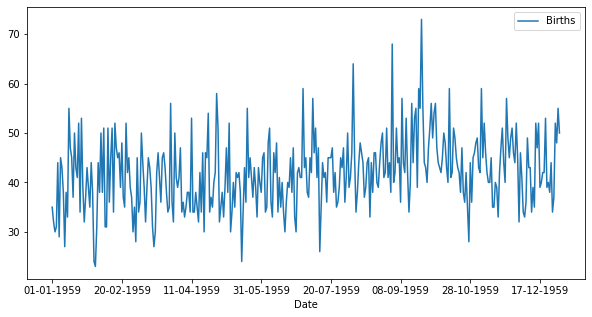

In [ ]:
df.plot(figsize=(10,5))

In [ ]:
df['Mean']=df.rolling(5).mean()
df.head(7)

,Births,Mean
Date,,
01-01-1959,35,NaN
02-01-1959,32,NaN
03-01-1959,30,NaN
04-01-1959,31,NaN
05-01-1959,44,34.4
06-01-1959,29,33.2
07-01-1959,45,35.8


In [ ]:
df.rolling(5).std().head(7)

,Births,Mean
Date,,
01-01-1959,NaN,NaN
02-01-1959,NaN,NaN
03-01-1959,NaN,NaN
04-01-1959,NaN,NaN
05-01-1959,5.683309,NaN
06-01-1959,6.140033,NaN
07-01-1959,7.981228,NaN


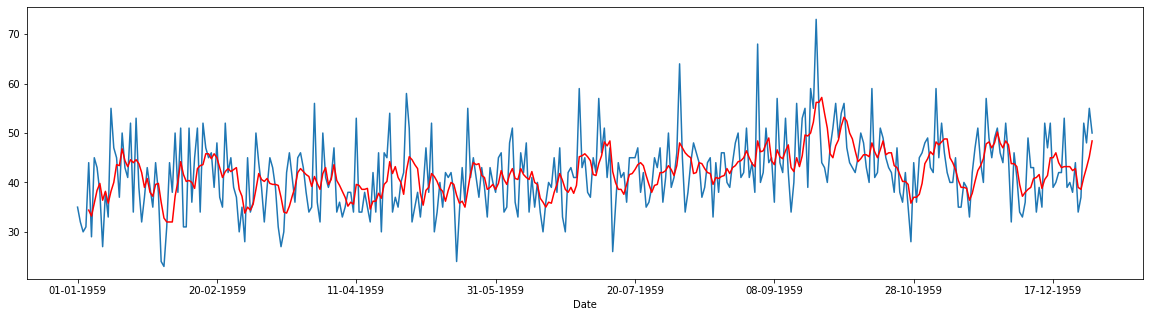

In [ ]:
df['Births'].plot(figsize=(20,5))
df.rolling(5).mean()['Births'].plot(color = 'red')

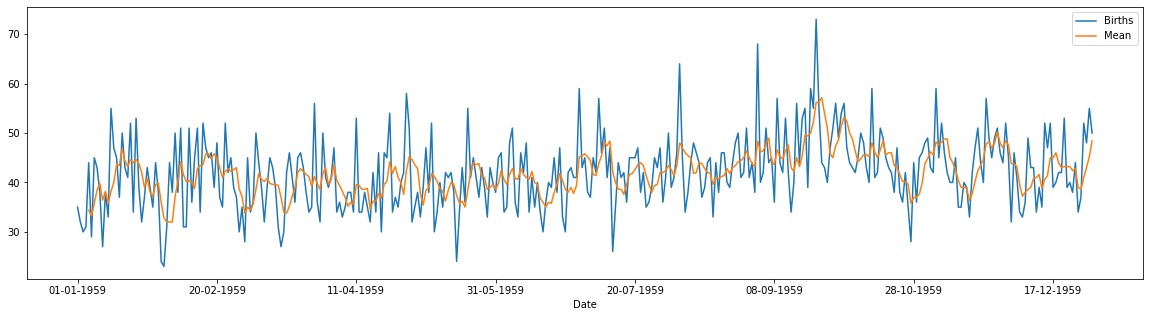

In [ ]:
df[['Births','Mean']].plot(figsize=(20,5))

In [ ]:
df['EMA_False'] = df.iloc[:,0].ewm(span=5,adjust=False).mean()
df['EMA_True'] = df.iloc[:,0].ewm(span=5).mean()
df.head()

,Births,Mean,EMA_False,EMA_True
Date,,,,
01-01-1959,35,NaN,35.000000,35.000000
02-01-1959,32,NaN,34.000000,33.200000
03-01-1959,30,NaN,32.666667,31.684211
04-01-1959,31,NaN,32.111111,31.400000
05-01-1959,44,34.4,36.074074,36.236967


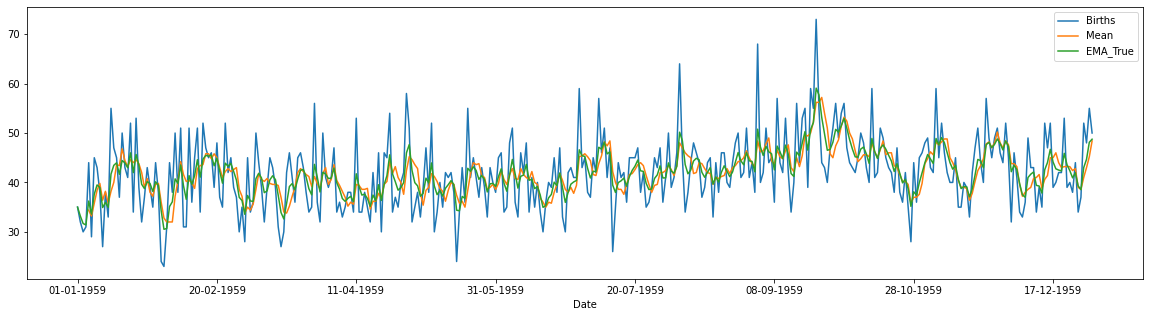

In [ ]:
df[['Births','Mean','EMA_True']].plot(figsize=(20,5))

In [ ]:
df.shape

(365, 4)

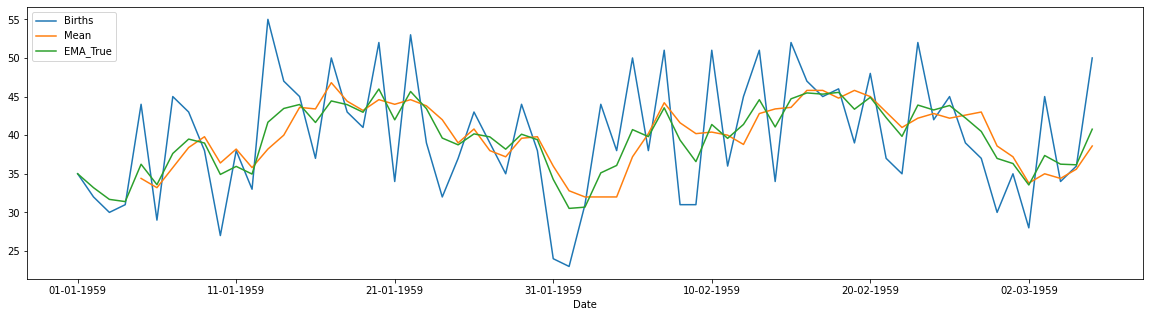

In [ ]:
df[['Births','Mean','EMA_True']].iloc[0:65].plot(figsize=(20,5))

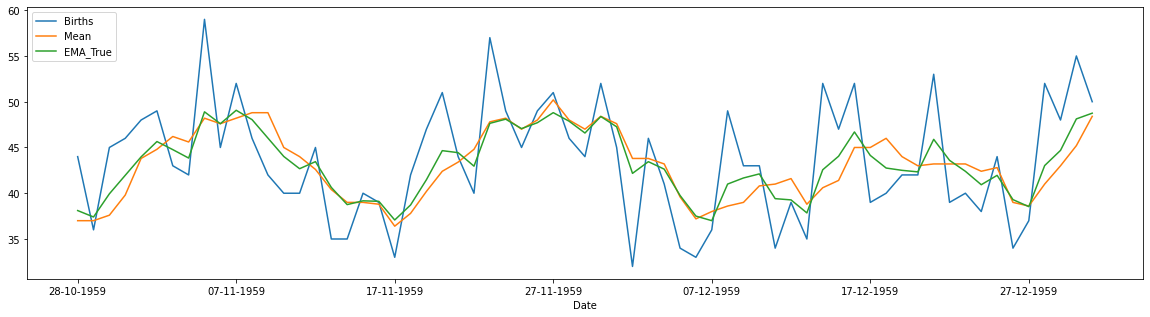

In [ ]:
df[['Births','Mean','EMA_True']].iloc[300:365].plot(figsize=(20,5))

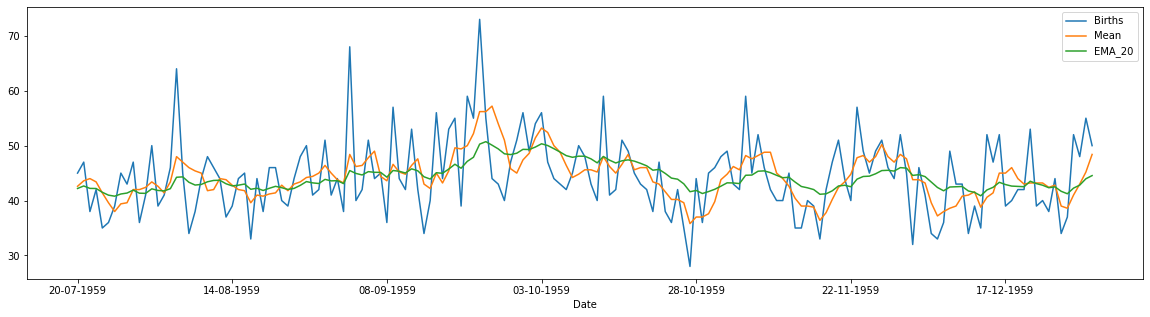

In [ ]:
df['EMA_20'] = df.iloc[:,0].ewm(span=20).mean()
df[['Births','Mean','EMA_20']].iloc[200:365].plot(figsize=(20,5))
#df[['Births','Mean','EMA_20']].plot(figsize=(20,5))

In [ ]:
#alpha  = 2/(span+1) for span >= 1
2/(5+1)

0.3333333333333333

In [ ]:
df['EMA_0.1'] = df.iloc[:,0].ewm(alpha = 0.1).mean()
df['EMA_0.4'] = df.iloc[:,0].ewm(alpha = 0.4).mean()
df['EMA_0.7'] = df.iloc[:,0].ewm(alpha = 0.7).mean()
df['EMA_0.9'] = df.iloc[:,0].ewm(alpha = 0.9).mean()

In [ ]:
df.columns

Index(['Births', 'Mean', 'EMA_False', 'EMA_True', 'EMA_20', 'EMA_0.1',
       'EMA_0.4', 'EMA_0.7', 'EMA_1'],
      dtype='object')

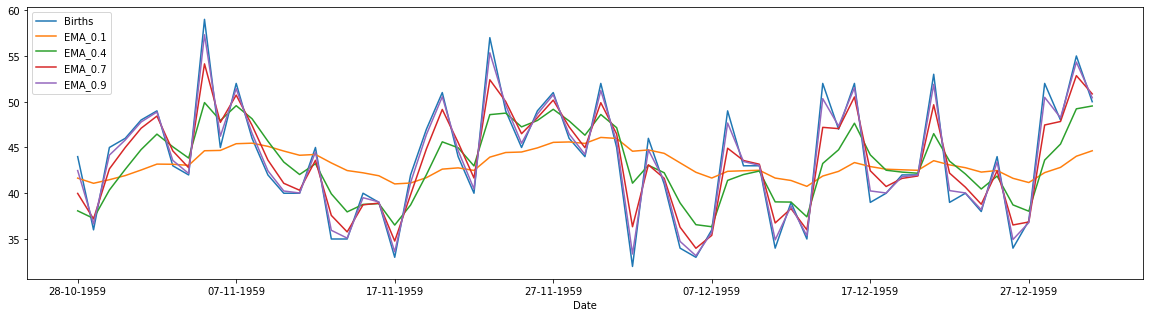

In [ ]:
df[['Births','EMA_0.1',
       'EMA_0.4', 'EMA_0.7','EMA_0.9']].iloc[300:365].plot(figsize=(20,5))

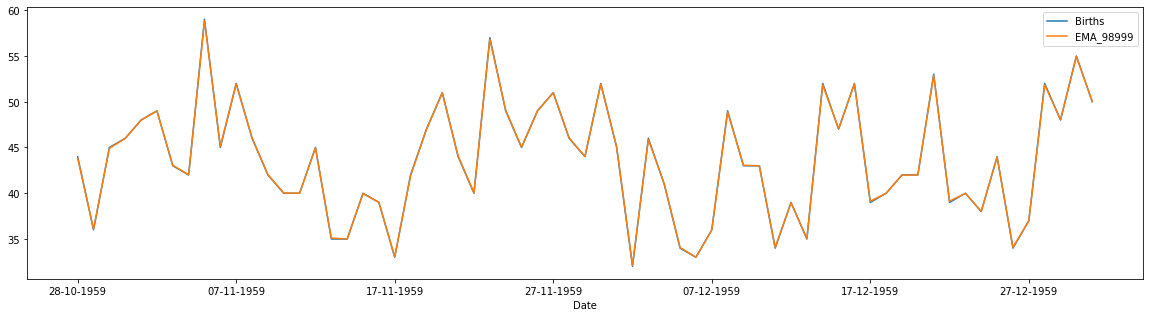

In [ ]:
df['EMA_98999'] = df.iloc[:,0].ewm(alpha = .98999).mean()
df[['Births','EMA_98999']].iloc[300:365].plot(figsize=(20,5))